In [1]:
# pip install chardet pandas -i https://mirrors.aliyun.com/pypi/simple/

In [2]:
import chardet 
import pandas as pd
# 读取CSV文件
csv_file = '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-平台山.csv'  # 替换为你的CSV文件路径

# 检测文件编码
with open(csv_file, 'rb') as f:
    result = chardet.detect(f.read())  # 读取文件内容，探测编码

print(result['encoding'])
# 使用探测到的编码读取文件
df = pd.read_csv(csv_file, encoding=result['encoding'])

ascii


In [3]:
print(df.columns)

Index(['date', 'temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN',
       'conductivity', 'turbidity', 'chla', 'density'],
      dtype='object')


每日密度数据的统计分析结果（包括95%置信区间）：
                    mean           std  count      lower_ci      upper_ci
date                                                                     
2021-01-01  6.365723e+06  2.777949e+06      6  4.142901e+06  8.588545e+06
2021-01-02  1.960963e+06  2.894708e+05      6  1.729338e+06  2.192588e+06
2021-01-03  1.667835e+06  7.658882e+05      6  1.054997e+06  2.280673e+06
2021-01-04  1.734870e+06  2.198017e+06      6 -2.391002e+04  3.493650e+06
2021-01-05  1.387818e+06  5.404892e+05      6  9.553369e+05  1.820300e+06
...                  ...           ...    ...           ...           ...
2021-05-23  1.131308e+07  1.176413e+06      6  1.037176e+07  1.225441e+07
2021-05-24  1.322169e+07  1.126109e+07      6  4.210941e+06  2.223245e+07
2021-05-25  1.177924e+07  7.212507e+06      5  5.457195e+06  1.810128e+07
2021-05-26  1.179611e+07  3.383792e+06      6  9.088511e+06  1.450371e+07
2021-05-27  1.720000e+07  4.413615e+06      4  1.287466e+07  2.152534e+07

[147 rows x

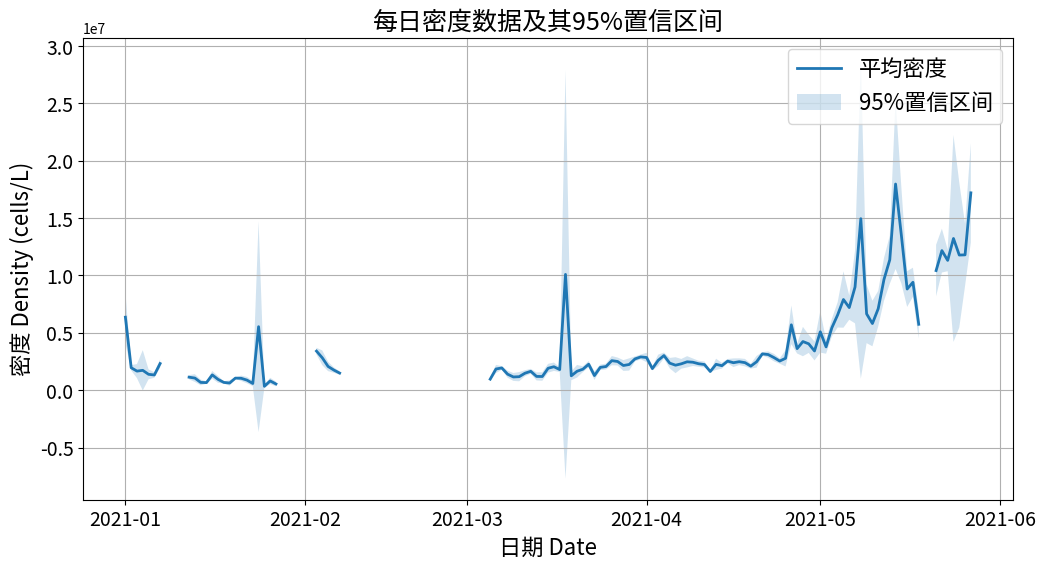

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置中英文字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'DejaVu Sans']
plt.rcParams['font.serif'] = ['DejaVu Serif']
plt.rcParams['axes.unicode_minus'] = False

chinese_font = fm.FontProperties(family='Noto Sans CJK JP', size=16)
english_font = fm.FontProperties(family='DejaVu Serif', size=16)

# 将日期列转换为日期时间格式
df['date'] = pd.to_datetime(df['date'])

# 将除date外的负值替换为nan
columns_to_process = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN',
                     'conductivity', 'turbidity', 'chla', 'density']
for col in columns_to_process:
    df.loc[df[col] < 0, col] = np.nan

# 设置日期为索引
df.set_index('date', inplace=True)

# 按日期分组并计算每日的统计数据
daily_stats = df['density'].resample('D').agg(['mean', 'std', 'count'])

# 计算95%置信区间
confidence_interval = 1.96 * daily_stats['std'] / np.sqrt(daily_stats['count'])

# 计算置信区间的上下限
daily_stats['lower_ci'] = daily_stats['mean'] - confidence_interval
daily_stats['upper_ci'] = daily_stats['mean'] + confidence_interval

# 打印结果
print("每日密度数据的统计分析结果（包括95%置信区间）：")
print(daily_stats)

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(daily_stats.index, daily_stats['mean'], label='平均密度', linewidth=2)
plt.fill_between(daily_stats.index, daily_stats['lower_ci'], daily_stats['upper_ci'], alpha=0.2, label='95%置信区间')

plt.xlabel('日期 Date', fontproperties=chinese_font, fontsize=16)
plt.ylabel('密度 Density (cells/L)', fontproperties=chinese_font, fontsize=16)
plt.title('每日密度数据及其95%置信区间', fontproperties=chinese_font, fontsize=18)

plt.legend(prop=chinese_font, fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()


每日叶绿素a数据的统计分析结果（包括95%置信区间）：
                mean       std  count  lower_ci  upper_ci
date                                                     
2021-01-01  0.001167  0.000408      6  0.000840  0.001493
2021-01-02  0.001500  0.000548      6  0.001062  0.001938
2021-01-03  0.001000  0.000000      6  0.001000  0.001000
2021-01-04  0.001500  0.000548      6  0.001062  0.001938
2021-01-05  0.001500  0.000548      6  0.001062  0.001938
...              ...       ...    ...       ...       ...
2021-05-23  0.003625  0.001693      6  0.002270  0.004980
2021-05-24  0.002293  0.000068      4  0.002226  0.002359
2021-05-25  0.002610  0.000415      5  0.002246  0.002974
2021-05-26  0.002795  0.000318      6  0.002541  0.003049
2021-05-27  0.002808  0.000221      4  0.002591  0.003024

[147 rows x 5 columns]


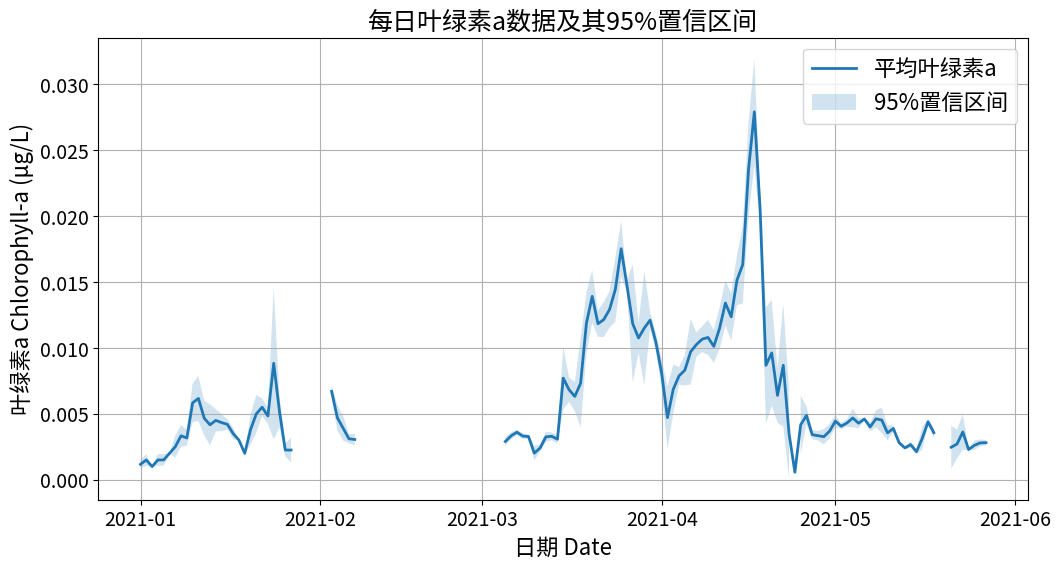

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# 设置中英文字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'DejaVu Sans']
plt.rcParams['font.serif'] = ['DejaVu Serif']
plt.rcParams['axes.unicode_minus'] = False

chinese_font = fm.FontProperties(family='Noto Sans CJK JP', size=16)
english_font = fm.FontProperties(family='DejaVu Serif', size=16)

# # 检查数据中的日期列
# date_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in ['date', 'time', '日期', '时间'])]

# if date_columns:
#     date_column = date_columns[0]
#     df['date'] = df[date_column]
# else:
#     raise ValueError("未找到日期列，请检查数据")

# df['date'] = pd.to_datetime(df['date'])

# # 设置日期为索引
# df.set_index('date', inplace=True)

# 按日期分组并计算每日的统计数据
daily_stats = df['chla'].resample('D').agg(['mean', 'std', 'count'])

# 计算95%置信区间
confidence_interval = 1.96 * daily_stats['std'] / np.sqrt(daily_stats['count'])

# 计算置信区间的上下限
daily_stats['lower_ci'] = daily_stats['mean'] - confidence_interval
daily_stats['upper_ci'] = daily_stats['mean'] + confidence_interval

# 打印结果
print("每日叶绿素a数据的统计分析结果（包括95%置信区间）：")
print(daily_stats)

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(daily_stats.index, daily_stats['mean'], label='平均叶绿素a', linewidth=2)
plt.fill_between(daily_stats.index, daily_stats['lower_ci'], daily_stats['upper_ci'], alpha=0.2, label='95%置信区间')

plt.xlabel('日期 Date', fontproperties=chinese_font, fontsize=16)
plt.ylabel('叶绿素a Chlorophyll-a (μg/L)', fontproperties=chinese_font, fontsize=16)
plt.title('每日叶绿素a数据及其95%置信区间', fontproperties=chinese_font, fontsize=18)

plt.legend(prop=chinese_font, fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()



原始变量和组合特征与藻密度的相关性分析:
density                     1.000000
temp_ph_interaction         0.526116
temperature                 0.510337
temp_oxygen_index           0.468257
pH                          0.445687
turbidity                   0.297898
oxygen_saturation_index     0.241296
water_quality_index         0.222167
nutrient_limitation        -0.002157
TP                         -0.019474
NP_ratio                   -0.060880
permanganate               -0.120903
light_turbidity_index      -0.123787
TN                         -0.132376
eutrophication_index       -0.147569
chla                       -0.159811
NH_TN_ratio                -0.164555
nutrient_pollution_index   -0.186678
NH                         -0.228966
conductivity               -0.229675
oxygen                     -0.372387
Name: density, dtype: float64


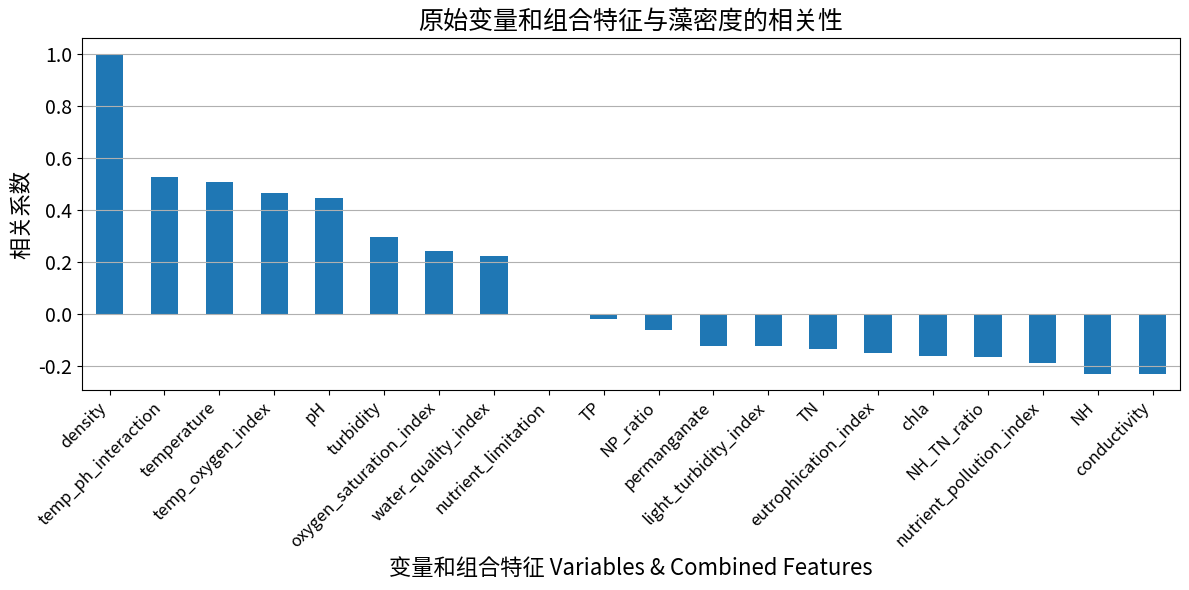

<Figure size 1200x1200 with 0 Axes>

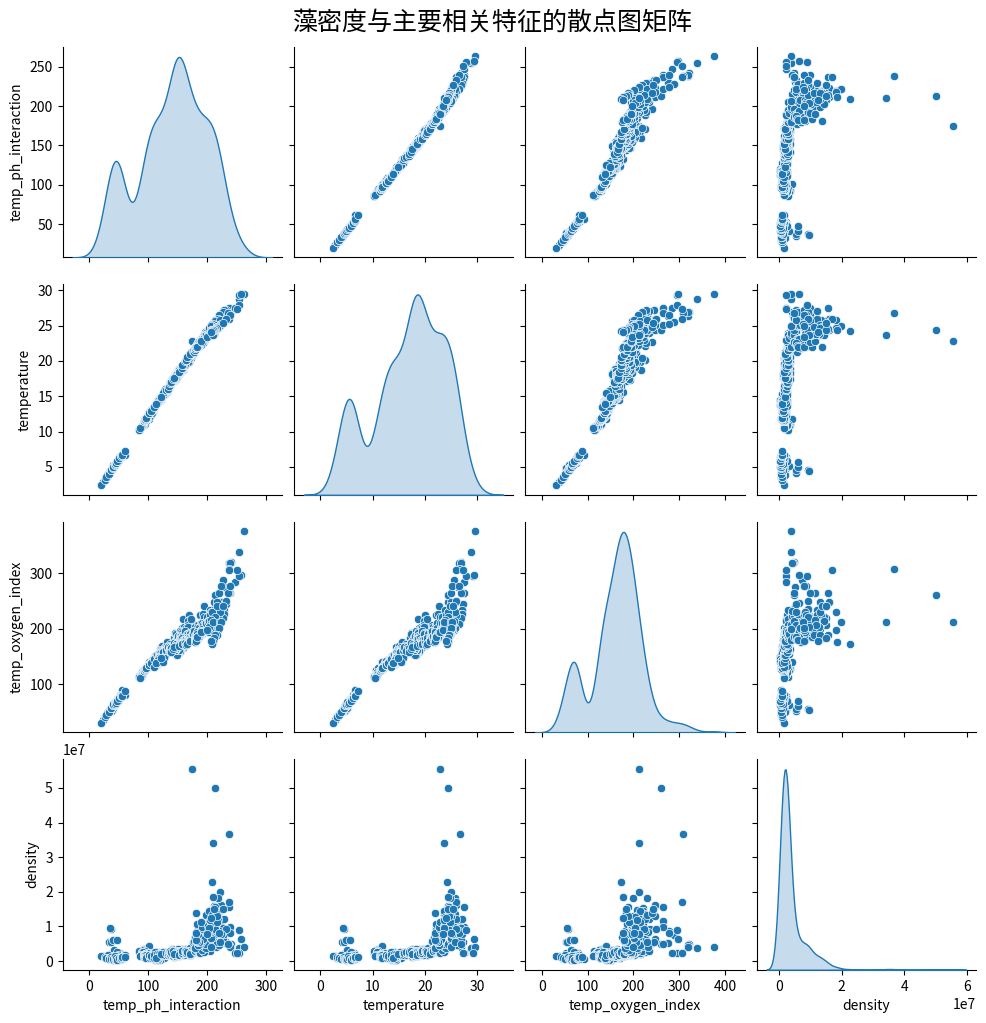

In [6]:
# 创建组合特征
# 1. 营养盐比值 (N/P比)
df['NP_ratio'] = df['TN'] / df['TP']

# 2. 温氧指数 (温度和溶解氧的乘积)
df['temp_oxygen_index'] = df['temperature'] * df['oxygen']

# 3. 富营养化指数 (基于氮磷和有机物)
df['eutrophication_index'] = (df['TN'] + df['TP'] + df['permanganate']) / 3

# 4. 水质综合指数 (pH、浊度和电导率的加权组合)
df['water_quality_index'] = (df['pH'] * 0.3 + df['turbidity'] * 0.4 + df['conductivity'] * 0.3)

# 5. 氮磷污染指数
df['nutrient_pollution_index'] = df['NH'] * df['TP']

# 6. 温度与pH的交互作用
df['temp_ph_interaction'] = df['temperature'] * df['pH']

# 7. 氨氮与总氮比值 (反映无机氮占比)
df['NH_TN_ratio'] = df['NH'] / df['TN']

# 8. 溶解氧饱和度指数 (考虑温度影响)
df['oxygen_saturation_index'] = df['oxygen'] / (14.652 - 0.41022 * df['temperature'] + 0.007991 * df['temperature']**2 - 0.000077774 * df['temperature']**3)

# 9. 营养盐限制因子 (最小营养盐法则)
df['nutrient_limitation'] = np.minimum(df['TN']/7.2, df['TP']/1)

# 10. 光照-浊度指数 (假设有光照数据，这里用浊度的倒数近似)
df['light_turbidity_index'] = 1 / (df['turbidity'] + 1)

# 合并原始变量和新特征
combined_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                'conductivity', 'turbidity', 'chla', 
                'NP_ratio', 'temp_oxygen_index', 'eutrophication_index',
                'water_quality_index', 'nutrient_pollution_index',
                'temp_ph_interaction', 'NH_TN_ratio', 'oxygen_saturation_index',
                'nutrient_limitation', 'light_turbidity_index']

# 计算与藻密度的相关性
correlations = df[combined_vars + ['density']].corr()['density'].sort_values(ascending=False)

# 打印相关性结果
print("\n原始变量和组合特征与藻密度的相关性分析:")
print(correlations)

# 可视化相关性
plt.figure(figsize=(12, 6))
correlations[:-1].plot(kind='bar')
plt.title('原始变量和组合特征与藻密度的相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量和组合特征 Variables & Combined Features', fontproperties=chinese_font, fontsize=16)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制散点图矩阵
import seaborn as sns

# 选择相关性最强的4个特征（包括组合特征）
top_corr_vars = correlations.index[:4].tolist()
if 'density' in top_corr_vars:
    top_corr_vars.remove('density')
vars_to_plot = top_corr_vars + ['density']

# 检查数据是否为空
plot_data = df[vars_to_plot].dropna()
if not plot_data.empty:
    plt.figure(figsize=(12, 12))
    sns.pairplot(plot_data, diag_kind='kde')
    plt.suptitle('藻密度与主要相关特征的散点图矩阵', y=1.02, fontproperties=chinese_font, fontsize=18)
    plt.show()
else:
    print("数据为空,无法绘制散点图矩阵")


叶绿素a与其他变量的相关性分析:
chla                        1.000000
light_turbidity_index       0.283628
conductivity                0.190288
temp_oxygen_index           0.179060
temperature                 0.140059
temp_ph_interaction         0.113080
NP_ratio                    0.099713
oxygen_saturation_index     0.054141
permanganate                0.052662
eutrophication_index        0.050757
TN                          0.039914
water_quality_index        -0.026416
pH                         -0.074759
nutrient_limitation        -0.141405
TP                         -0.141602
density                    -0.159811
oxygen                     -0.168568
NH_TN_ratio                -0.219694
nutrient_pollution_index   -0.285753
turbidity                  -0.286762
NH                         -0.303217
Name: chla, dtype: float64


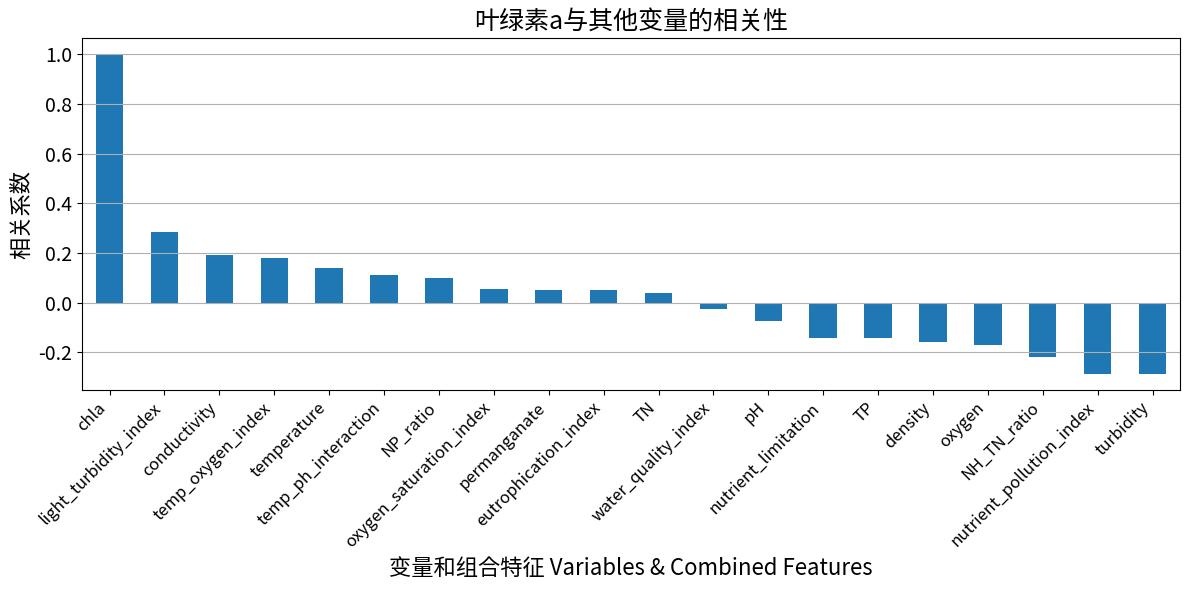

<Figure size 1200x1200 with 0 Axes>

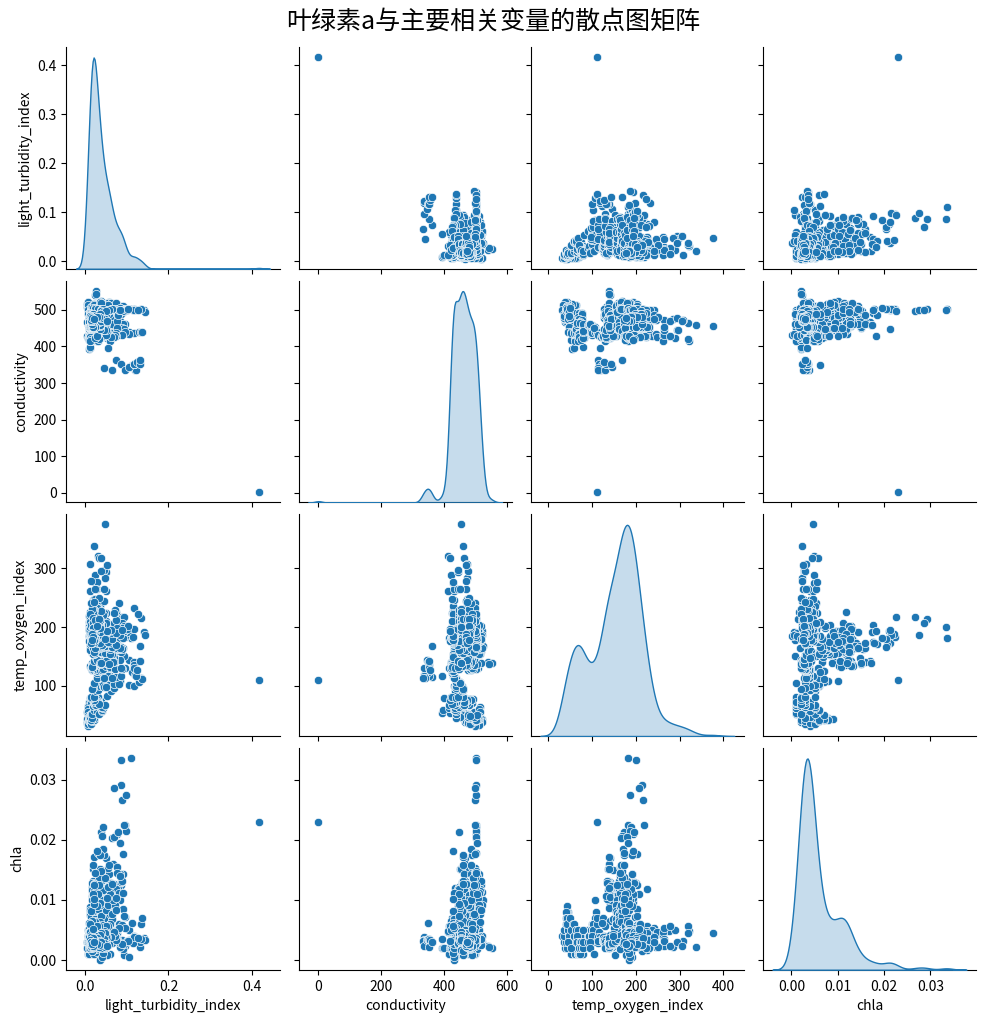

In [7]:
# 计算叶绿素a与其他变量的相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'density',
                   'NP_ratio', 'temp_oxygen_index', 'eutrophication_index',
                   'water_quality_index', 'nutrient_pollution_index',
                   'temp_ph_interaction', 'NH_TN_ratio', 'oxygen_saturation_index',
                   'nutrient_limitation', 'light_turbidity_index']
correlations = df[correlation_vars + ['chla']].corr()['chla'].sort_values(ascending=False)

# 打印相关性结果
print("\n叶绿素a与其他变量的相关性分析:")
print(correlations)

# 可视化相关性
plt.figure(figsize=(12, 6))
correlations[:-1].plot(kind='bar')
plt.title('叶绿素a与其他变量的相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量和组合特征 Variables & Combined Features', fontproperties=chinese_font, fontsize=16)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制散点图矩阵
import seaborn as sns

# 选择相关性最强的4个变量,并确保chla只出现一次
top_corr_vars = correlations.index[:4].tolist()
if 'chla' in top_corr_vars:
    top_corr_vars.remove('chla')
vars_to_plot = top_corr_vars + ['chla']

# 检查数据是否为空
plot_data = df[vars_to_plot].dropna()
if not plot_data.empty:
    plt.figure(figsize=(12, 12))
    sns.pairplot(plot_data, diag_kind='kde')
    plt.suptitle('叶绿素a与主要相关变量的散点图矩阵', y=1.02, fontproperties=chinese_font, fontsize=18)
    plt.show()
else:
    print("数据为空,无法绘制散点图矩阵")



藻密度与其他变量的当前相关性分析:
density                     1.000000
temp_ph_interaction         0.526116
temperature                 0.510337
temp_oxygen_index           0.468257
pH                          0.445687
turbidity                   0.297898
oxygen_saturation_index     0.241296
water_quality_index         0.222167
nutrient_limitation        -0.002157
TP                         -0.019474
NP_ratio                   -0.060880
permanganate               -0.120903
light_turbidity_index      -0.123787
TN                         -0.132376
eutrophication_index       -0.147569
chla                       -0.159811
NH_TN_ratio                -0.164555
nutrient_pollution_index   -0.186678
NH                         -0.228966
conductivity               -0.229675
oxygen                     -0.372387
Name: density, dtype: float64


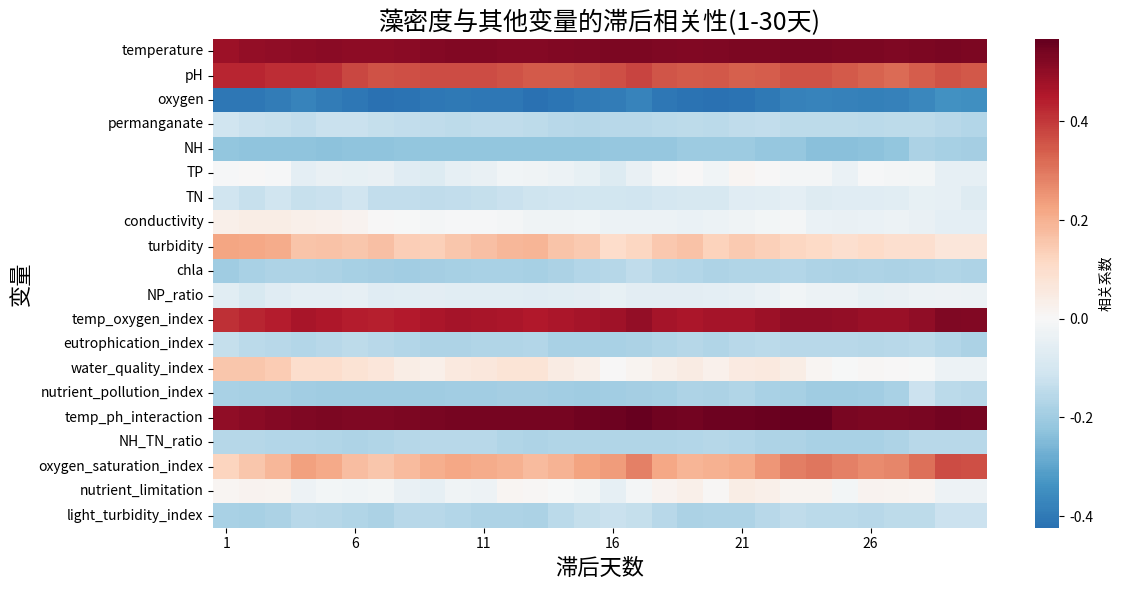


各变量的最大滞后相关性及对应滞后天数:
temperature: 相关系数 = 0.538, 滞后天数 = 23
pH: 相关系数 = 0.431, 滞后天数 = 2
oxygen: 相关系数 = -0.423, 滞后天数 = 7
permanganate: 相关系数 = -0.165, 滞后天数 = 30
NH: 相关系数 = -0.237, 滞后天数 = 24
TP: 相关系数 = -0.078, 滞后天数 = 16
TN: 相关系数 = -0.144, 滞后天数 = 9
conductivity: 相关系数 = -0.055, 滞后天数 = 30
turbidity: 相关系数 = 0.224, 滞后天数 = 1
chla: 相关系数 = -0.200, 滞后天数 = 1
NP_ratio: 相关系数 = -0.087, 滞后天数 = 2
temp_oxygen_index: 相关系数 = 0.525, 滞后天数 = 29
eutrophication_index: 相关系数 = -0.182, 滞后天数 = 15
water_quality_index: 相关系数 = 0.158, 滞后天数 = 1
nutrient_pollution_index: 相关系数 = -0.202, 滞后天数 = 25
temp_ph_interaction: 相关系数 = 0.567, 滞后天数 = 23
NH_TN_ratio: 相关系数 = -0.182, 滞后天数 = 24
oxygen_saturation_index: 相关系数 = 0.368, 滞后天数 = 29
nutrient_limitation: 相关系数 = -0.050, 滞后天数 = 9
light_turbidity_index: 相关系数 = -0.189, 滞后天数 = 2


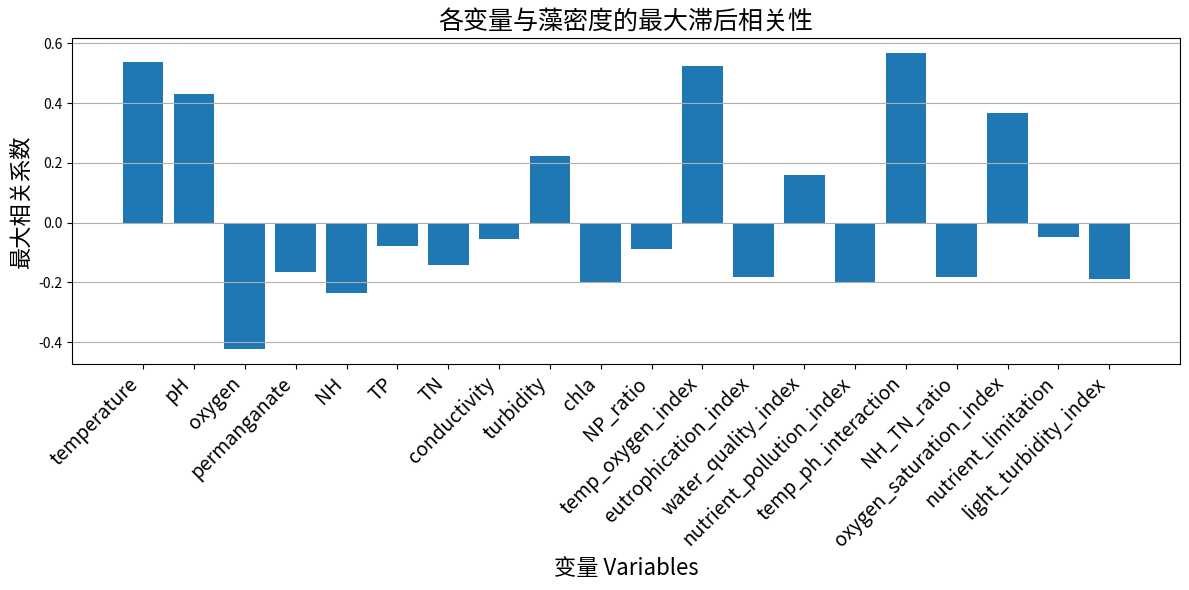

In [8]:
# 计算藻密度与其他变量的相关性及滞后相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'chla',
                   'NP_ratio', 'temp_oxygen_index', 'eutrophication_index',
                   'water_quality_index', 'nutrient_pollution_index',
                   'temp_ph_interaction', 'NH_TN_ratio', 'oxygen_saturation_index',
                   'nutrient_limitation', 'light_turbidity_index']

# 计算当前相关性
current_correlations = df[correlation_vars + ['density']].corr()['density'].sort_values(ascending=False)
print("\n藻密度与其他变量的当前相关性分析:")
print(current_correlations)

# 计算滞后相关性
max_lag = 30  # 最大滞后天数
lag_correlations = {}

for var in correlation_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        # 计算滞后相关性
        lagged_corr = df[var].shift(lag).corr(df['density'])
        lag_corrs.append(lagged_corr)
    lag_correlations[var] = lag_corrs

# 绘制滞后相关性热力图
plt.figure(figsize=(12, 6))
lag_data = pd.DataFrame(lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(lag_data.T, cmap='RdBu_r', center=0, 
            xticklabels=5, # 每5天显示一个刻度
            cbar_kws={'label': '相关系数'})
plt.title('藻密度与其他变量的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=18)
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('变量', fontproperties=chinese_font, fontsize=16)
plt.tight_layout()
plt.show()

# 找出每个变量的最大滞后相关性
max_lag_correlations = {}
for var in correlation_vars:
    max_corr = max(lag_correlations[var], key=abs)
    max_lag = lag_correlations[var].index(max_corr) + 1
    max_lag_correlations[var] = (max_corr, max_lag)

print("\n各变量的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

# 绘制最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
max_corrs = [corr for corr, _ in max_lag_correlations.values()]
plt.bar(max_lag_correlations.keys(), max_corrs)
plt.title('各变量与藻密度的最大滞后相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量 Variables', fontproperties=chinese_font, fontsize=16)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


叶绿素a与其他变量的当前相关性分析:
chla                        1.000000
light_turbidity_index       0.283628
conductivity                0.190288
temp_oxygen_index           0.179060
temperature                 0.140059
temp_ph_interaction         0.113080
NP_ratio                    0.099713
oxygen_saturation_index     0.054141
permanganate                0.052662
eutrophication_index        0.050757
TN                          0.039914
water_quality_index        -0.026416
pH                         -0.074759
nutrient_limitation        -0.141405
TP                         -0.141602
density                    -0.159811
oxygen                     -0.168568
NH_TN_ratio                -0.219694
nutrient_pollution_index   -0.285753
turbidity                  -0.286762
NH                         -0.303217
Name: chla, dtype: float64


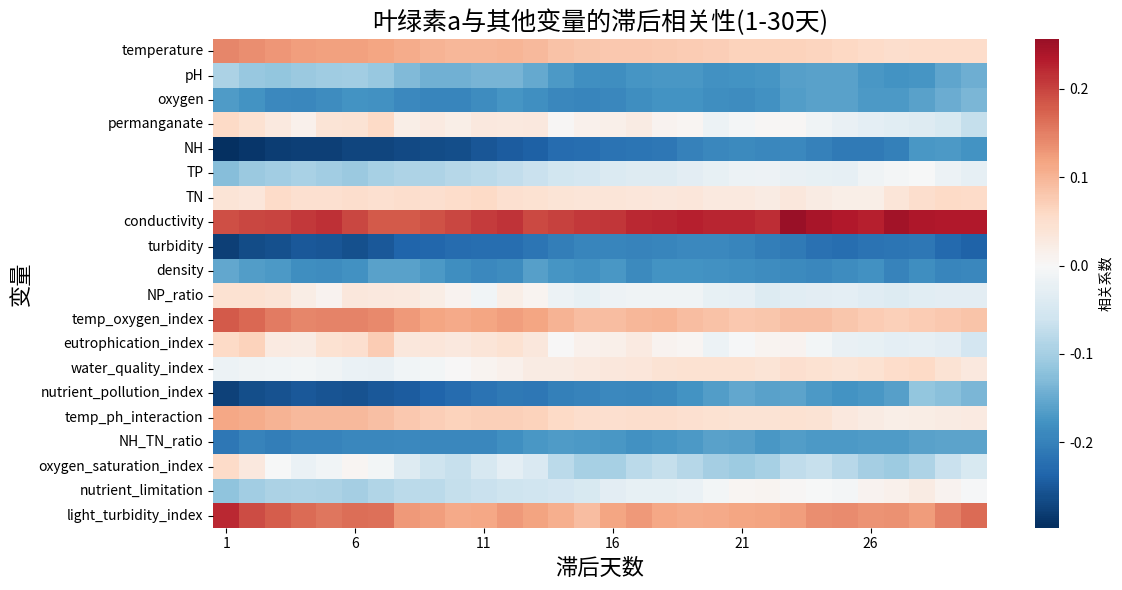


各变量的最大滞后相关性及对应滞后天数:
temperature: 相关系数 = 0.143, 滞后天数 = 1
pH: 相关系数 = -0.182, 滞后天数 = 16
oxygen: 相关系数 = -0.197, 滞后天数 = 9
permanganate: 相关系数 = -0.070, 滞后天数 = 30
NH: 相关系数 = -0.297, 滞后天数 = 1
TP: 相关系数 = -0.125, 滞后天数 = 1
TN: 相关系数 = 0.059, 滞后天数 = 11
conductivity: 相关系数 = 0.257, 滞后天数 = 23
turbidity: 相关系数 = -0.278, 滞后天数 = 1
density: 相关系数 = -0.198, 滞后天数 = 27
NP_ratio: 相关系数 = 0.047, 滞后天数 = 1
temp_oxygen_index: 相关系数 = 0.181, 滞后天数 = 1
eutrophication_index: 相关系数 = 0.073, 滞后天数 = 7
water_quality_index: 相关系数 = 0.059, 滞后天数 = 28
nutrient_pollution_index: 相关系数 = -0.277, 滞后天数 = 1
temp_ph_interaction: 相关系数 = 0.116, 滞后天数 = 1
NH_TN_ratio: 相关系数 = -0.214, 滞后天数 = 1
oxygen_saturation_index: 相关系数 = -0.109, 滞后天数 = 21
nutrient_limitation: 相关系数 = -0.119, 滞后天数 = 1
light_turbidity_index: 相关系数 = 0.224, 滞后天数 = 1


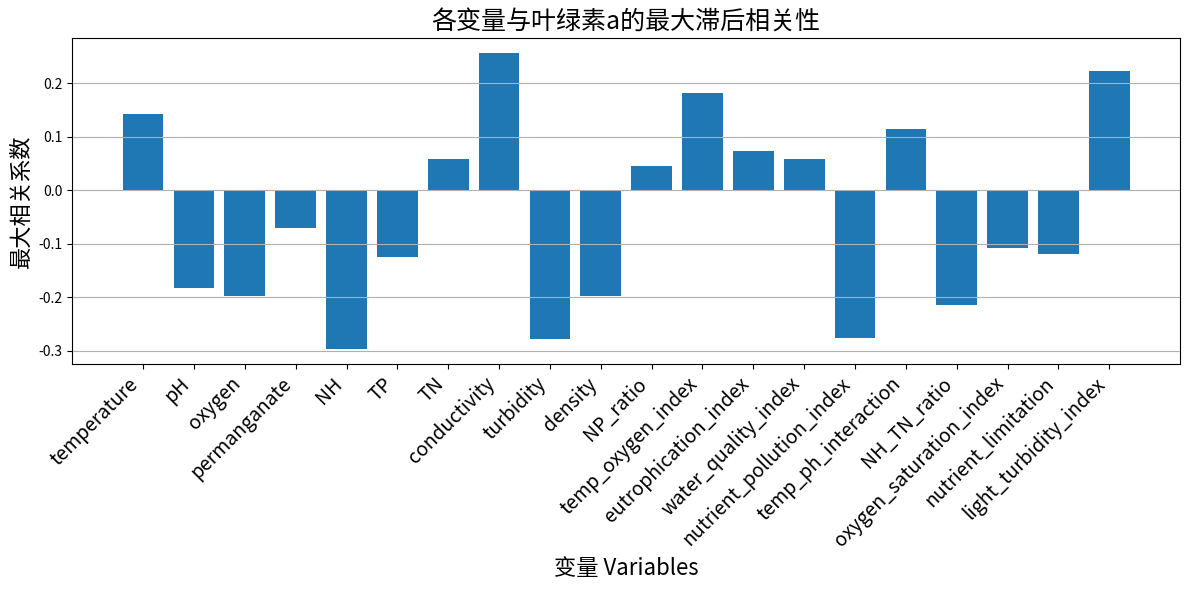

In [9]:
# 计算叶绿素a与其他变量的相关性及滞后相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'density',
                   'NP_ratio', 'temp_oxygen_index', 'eutrophication_index',
                   'water_quality_index', 'nutrient_pollution_index',
                   'temp_ph_interaction', 'NH_TN_ratio', 'oxygen_saturation_index',
                   'nutrient_limitation', 'light_turbidity_index']

# 计算当前相关性
current_correlations = df[correlation_vars + ['chla']].corr()['chla'].sort_values(ascending=False)
print("\n叶绿素a与其他变量的当前相关性分析:")
print(current_correlations)

# 计算滞后相关性
max_lag = 30  # 最大滞后天数
lag_correlations = {}

for var in correlation_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        # 计算滞后相关性
        lagged_corr = df[var].shift(lag).corr(df['chla'])
        lag_corrs.append(lagged_corr)
    lag_correlations[var] = lag_corrs

# 绘制滞后相关性热力图
plt.figure(figsize=(12, 6))
lag_data = pd.DataFrame(lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(lag_data.T, cmap='RdBu_r', center=0, 
            xticklabels=5, # 每5天显示一个刻度
            cbar_kws={'label': '相关系数'})
plt.title('叶绿素a与其他变量的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=18)
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('变量', fontproperties=chinese_font, fontsize=16)
plt.tight_layout()
plt.show()

# 找出每个变量的最大滞后相关性
max_lag_correlations = {}
for var in correlation_vars:
    max_corr = max(lag_correlations[var], key=abs)
    max_lag = lag_correlations[var].index(max_corr) + 1
    max_lag_correlations[var] = (max_corr, max_lag)

print("\n各变量的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

# 绘制最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
max_corrs = [corr for corr, _ in max_lag_correlations.values()]
plt.bar(max_lag_correlations.keys(), max_corrs)
plt.title('各变量与叶绿素a的最大滞后相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量 Variables', fontproperties=chinese_font, fontsize=16)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()